In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [31]:
min_OD = 0.04
max_OD = 2
angle_range=270
def angle_to_OD(angle):
    return angle/angle_range*(max_OD-min_OD) + min_OD
def angle_to_trans(angle):
    OD = angle/angle_range*(max_OD-min_OD) + min_OD
    return pow(10, -2*OD)

def get_peak_to_peak(folder):
    files = os.listdir(folder)
    mi = -1
    ma = -1
    for f in files[:]:
        data = np.loadtxt(folder+'/'+f, skiprows=3)
        f_max = np.max(data[:,1])
        f_min = np.min(data[:,1])
        if mi == -1 or f_min < mi:
            mi = f_min
        if ma != -1 or f_max > ma:
            ma = f_max
    return ma-mi
def get_data(folder):
    data_dir = folder
    sub_folders = os.listdir(data_dir)
    sort_buffer = [s for s in sub_folders if s[0]!='#']
    sort_buffer.sort(key=float)
    sub_folders = [s for s in sub_folders if s[0]=='#']+sort_buffer
    ampls = []
    for s in sub_folders:
        ampls.append(get_peak_to_peak(data_dir+'/'+s))
    return [0] + [angle_to_OD(int(a)) for a in sub_folders[1:]], ampls/ampls[0]


In [32]:
day2 = get_data("Wheel of doom/")
day3 = get_data("day3/wheel of doom")

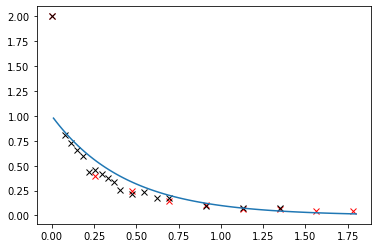

In [63]:
loss = 0.5
plt.plot(day2[0], day2[1]/(1-loss), 'rx')
plt.plot(day3[0], day3[1]/(1-loss), 'kx')
ODs = np.linspace(0.01, 1.8, 100)
plt.plot(ODs, 10**(-ODs))

Text(0, 0.5, 'Interference amplitude')

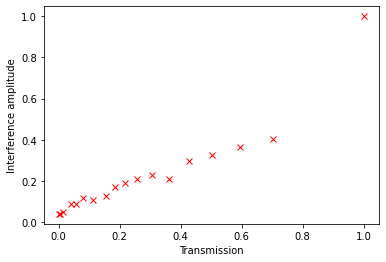

In [24]:
transmissions = [1] + [angle_to_trans(int(a)) for a in sub_folders[1:]]

plt.plot(transmissions, ampls/ampls[0], 'rx')
# plt.yscale("log")
plt.xlabel("Transmission")
plt.ylabel("Interference amplitude")

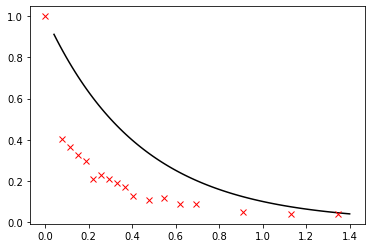

In [18]:
ODs = np.linspace(0.04, 1.4, 100)
data_ODs = [0] + [angle_to_OD(int(a)) for a in sub_folders[1:]]
plt.plot(ODs, 10**(-ODs), 'k')
plt.plot(data_ODs, (ampls/ampls[0]), 'rx')
